# Projeto 1 - Predição da precificação de casas 
## House Sales in King County, USA - Kaggle

## Introdução

Este é um conjunto de dados armazenado no Kaggle, uma plataforma de estudo e competições de Ciência de Dados. Segue a tradução sobre o conjunto de dados.

**"Este conjunto de dados contém preços de venda de casas para King County, que inclui Seattle. Inclui casas vendidas entre maio de 2014 e maio de 2015."**

Segue a descrição das variaveis:

- id - identificação unica para cada venda
- date - data da venda
- price - preço da venda
- bedrooms - número de quartos
- bathrooms - número de banheiros
- sqft_living - tamanho da casa em metros quadrados
- sqft_lot - tamanho do lote em metros quadrados
- floors - número de andares
- waterfront - vista para praia
- view - visitado
- condition - condição da casa
- grade - nota de qualidade (baseado no sistema de classificação do King County)
- sqft_above - tamanho da área abaixo da casa em metros quadrados
- sqft_basement - tamanho do porão em metros quadrados
- yr_built - ano de construção
- yr_renovated - ano da ultima reforma
- zipcode - CEP
- lat - latitude
- long - longitude
- sqft_living15 - área da casa em 2015 (implica a algumas reformas). Isso pode ou não ter afetado a área do lote
- sqft_lot15 - área do lote em 2015 (implica a algumas reformas)

# Sobre este projeto

Este é o seu primeiro projeto usando Ciência de Dados. Neste projeto treine os conhecimentos aprendidos até o momento e que entenda algumas das dificuldades que pode ter quando for aplicar os mesmos. 

Os principais pontos que serão avaliados:

- Levantamento de hipoteses
- Manipulação de dados e criação de gráficos simples com o `Pandas`
- Criar um modelo usando regressão linear e justificar

# Preparação do ambiente

- Acessem o link - https://www.kaggle.com/datasets/harlfoxem/housesalesprediction e logo abaixo cliquem em "Download". Caso voce não tenha uma conta no Kaggle, crie uma e retorne para esse ponto para realizar o download.

In [ ]:
import numpy as np
import pandas as pd
# bibliotecas utilizadas para visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt
#biblioteca para separação dos nossos dados em treino/teste e modelo de regressão
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [ ]:
df_original = pd.read_csv("/content/kc_house_data.csv")
df_original.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


HIPOTESES:



1.  As casas com vista para a praia é mais alto o valor? 
2.   Uma casa com varios banheiro tem o preço alto?
3.   A metragem da casa, influencia no valor?
4.   As com melhor avaliações (grade) das casas afetam o valor?
5.   Ou estas informações são irrelevantes para a formação do preço da casa?



Utilizei graficos com os dados não tratado a fim de entender o dataset, procurar por respostas, sem necessidade de algoritmos a principio. Fiz questionamentos comuns ao mundo imobiliario e conforme eu julguei que faria caso fosse comprar uma casa nessa localidade. Acredito que os graficos ajudam a visualizar melhor as questões levantadas acima.

In [ ]:
#### (VALE 1.5 pontos)
#### CONSTRUA O SEU GRAFICO ABAIXO, USE MAIS CELULAS SE NECESSARIO
import seaborn as sns


In [ ]:
#fiz a copia do dataframe original para poder fazer as modificações, sem alterar a base original.
df = df_original.copy()
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


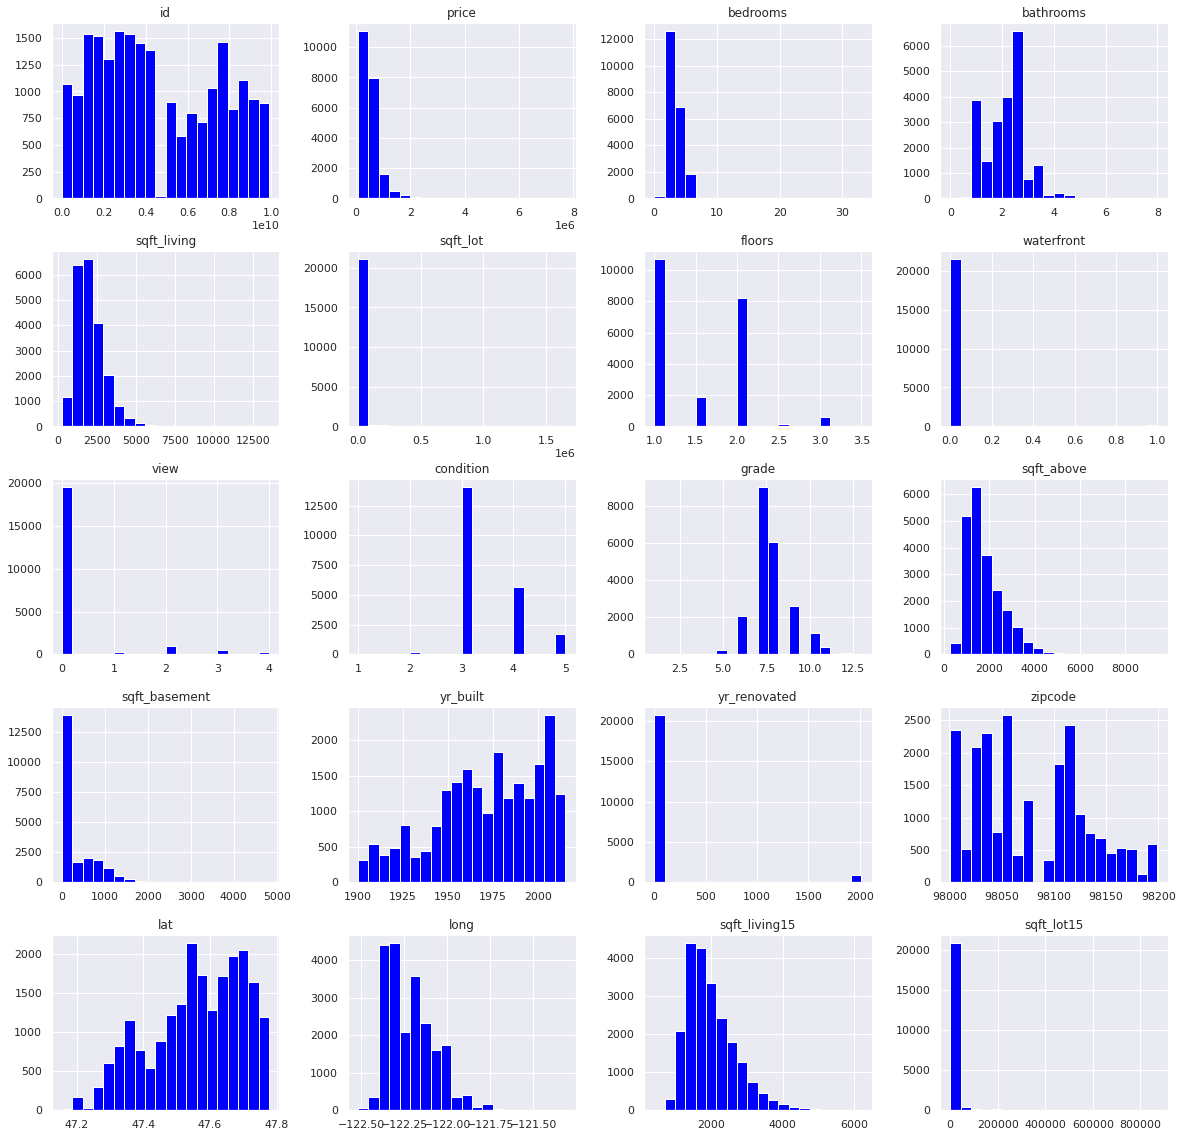

In [ ]:
sns.set( font_scale=1.0, rc= { 'figure.figsize':(20,20) } )
eixo = df.hist(bins=20, color='Blue')

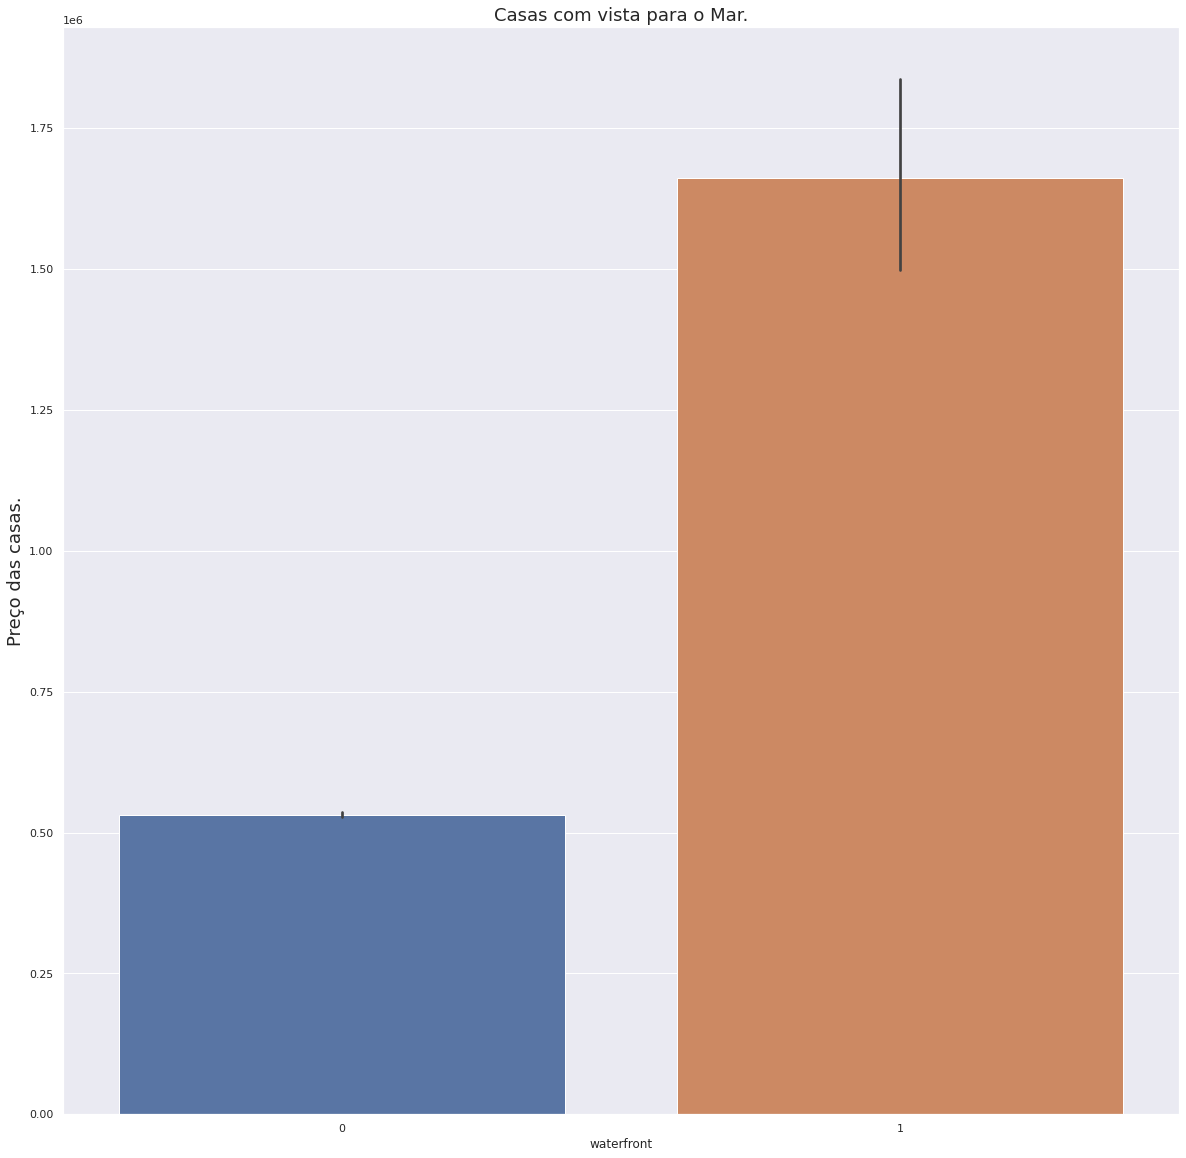

In [ ]:
#as casas com vista para o mar, tem os preços maiores
waterfront = sns.barplot(data=df, x='waterfront', y='price');
waterfront.set_title('Casas com vista para o Mar.', fontsize=18)
waterfront.set_ylabel('Preço das casas.', fontsize=18);


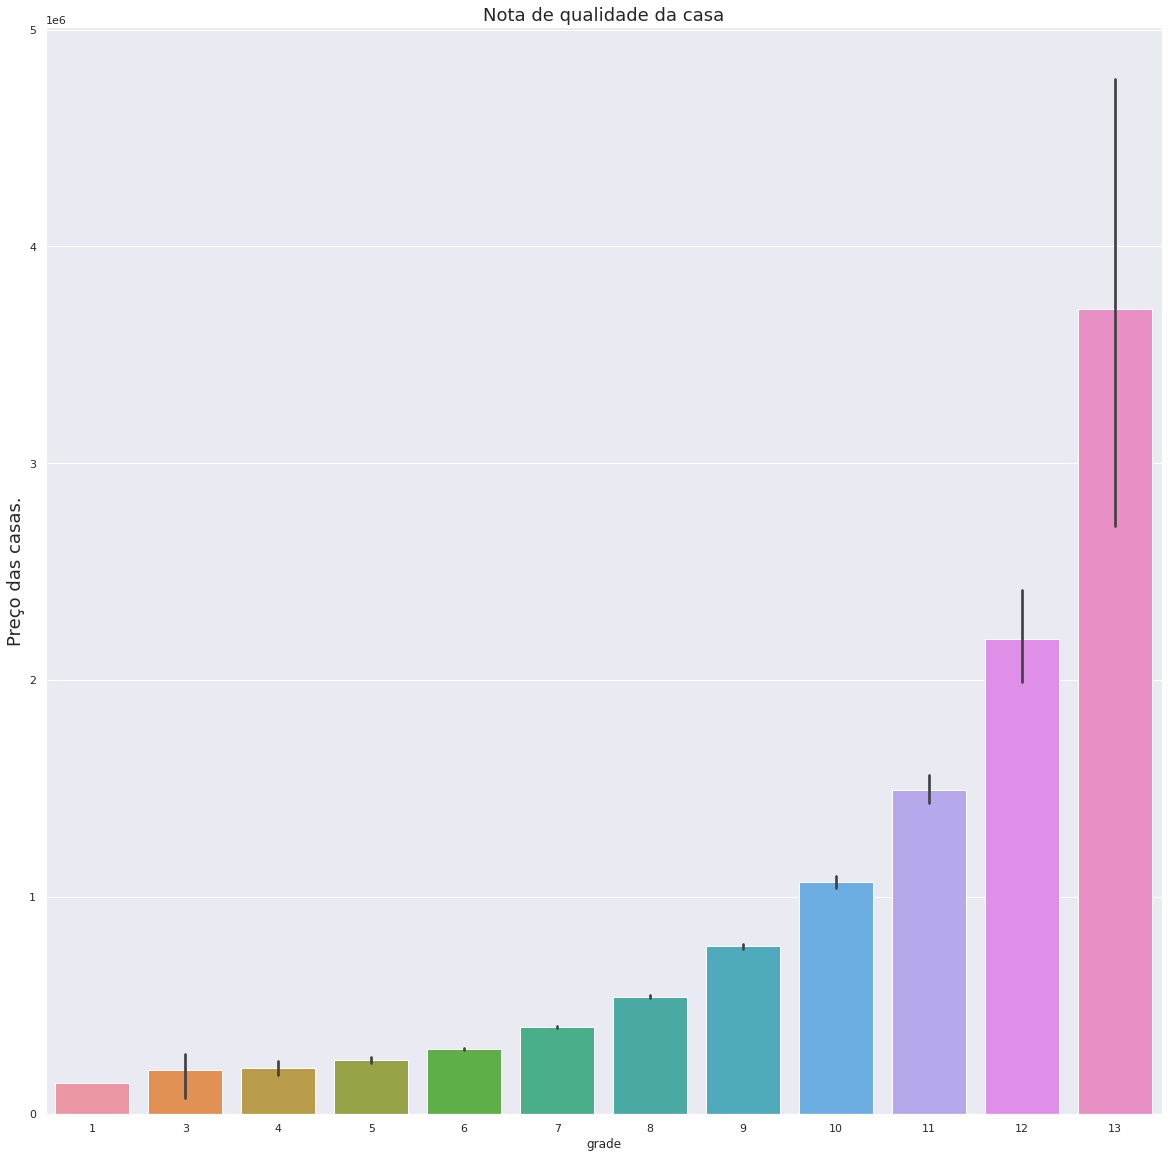

In [ ]:
#casas com as melhores condições
grade = sns.barplot(data=df, x='grade', y='price');
grade.set_title('Nota de qualidade da casa', fontsize=18)
grade.set_ylabel('Preço das casas.', fontsize=18);

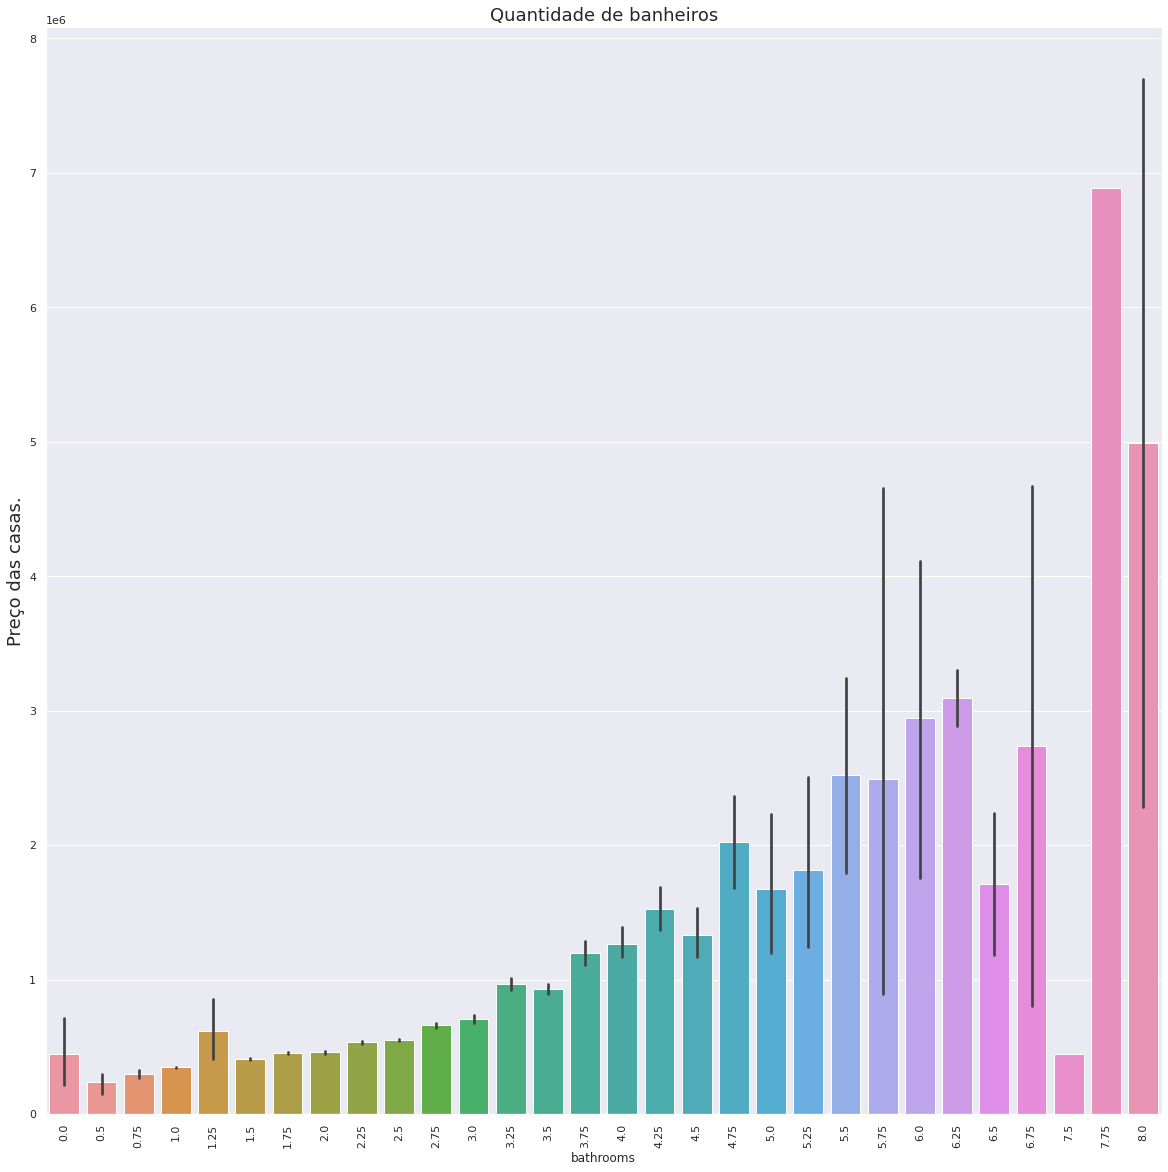

In [ ]:
#Casas com quantidades maiores de banheiros tem preços mais altos
bathrooms = sns.barplot(data=df, x='bathrooms', y='price');
bathrooms.set_title('Quantidade de banheiros', fontsize=18)
bathrooms.set_ylabel('Preço das casas.', fontsize=18);
plt.xticks(rotation=90);

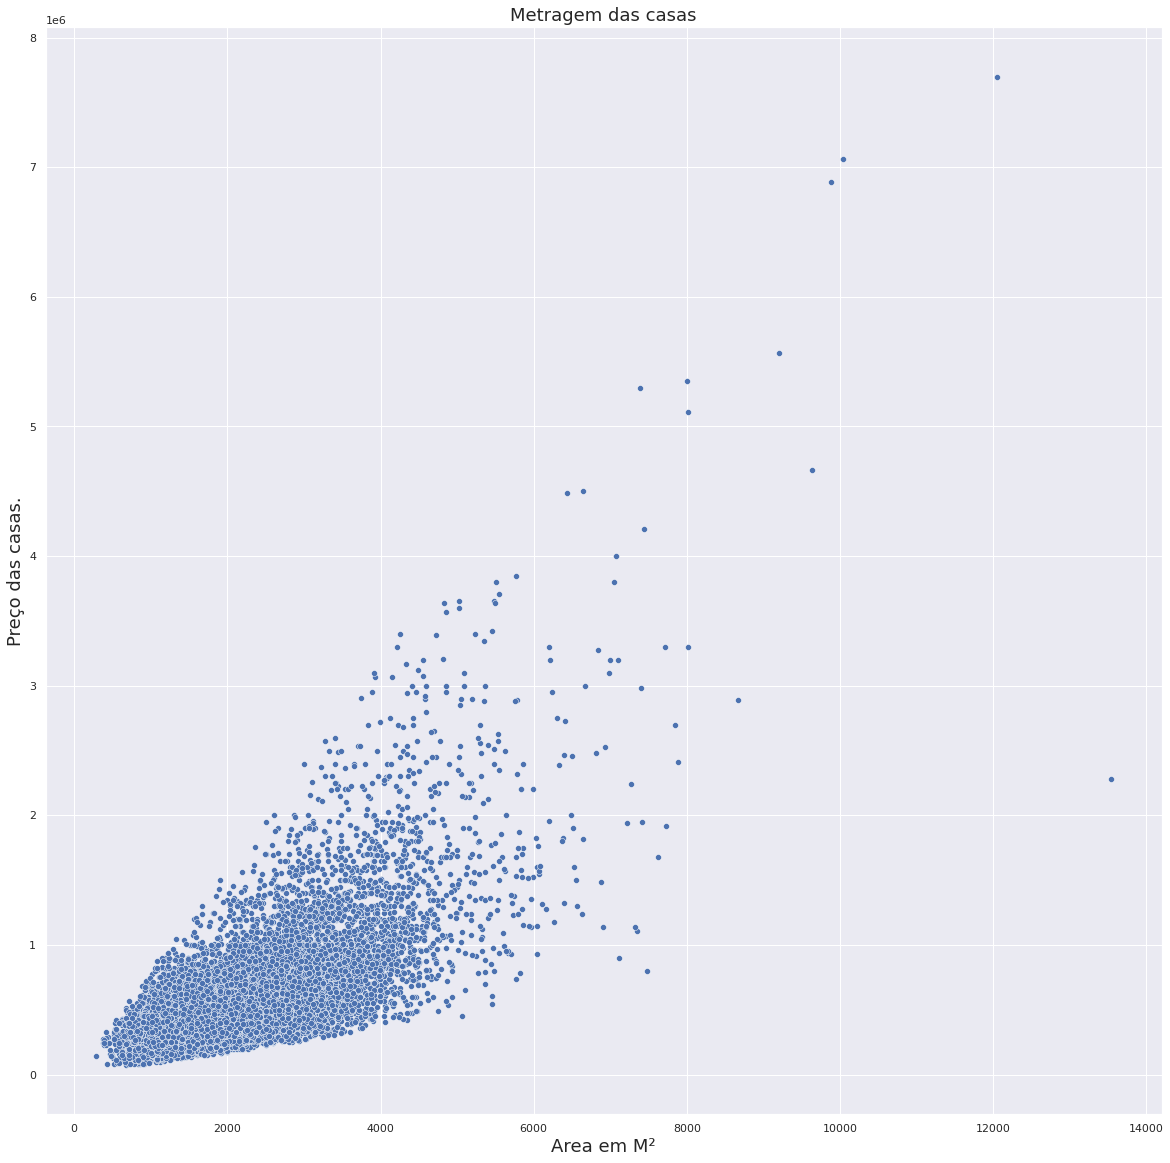

In [ ]:
#casas com maior metragem alteram o valor. e existem valores descrepantes.
area = sns.scatterplot(data=df , x = 'sqft_living' , y = 'price')
area.set_title('Metragem das casas', fontsize=18)
area.set_xlabel('Area em M²', fontsize=18)
area.set_ylabel('Preço das casas.', fontsize=18);

In [ ]:
#Casas quando foram construidas, comparadas com as casas reformadas no periodo.
import plotly.express as px

fig = px.histogram(df, x="yr_built", color='yr_renovated')
fig.show()

In [ ]:
#verificando as variaveis com maior correlação com a variavel price.
df.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

A sua visualização responde uma das suas perguntas? Se não, o que ela responde?

 

1. As casas com vista para a praia é mais alto o valor?
R: Sim, casas com vista para o mar são mais valorizadas.

2. Uma casa com varios banheiro tem o preço alto?
R: Casas com mais banheiros são mais caras.

3. A metragem da casa, influencia no valor?
R: A metragem tem influencia no valor do imoveil entretando ha valores descrepantes.


4. As condições das casas afetam o valor da casa?
As condições das casas valorizam ou desvalorizam a casa.

5. Ou estas informações são irrelevantes para a formação do preço da casa?
R: Em relação ao preço, as seguintes variaveis tem mais correlações.
  
  *sqft_living      0.702035 - metragem das casas

  *grade            0.667434 - avaliações

  *sqft_above       0.605567 - metragem porão

  *sqft_living15    0.585379 - metragem em 2015

  *bathrooms        0.525138 - banheiros


Faremos uma analise exploratoria sobre estes dados, preencha abaixo analises sobre o conjunto de dados. Para isso a biblioteca numpy para obter a contagem, média, mediana e os quartis.

In [ ]:
#### (VALE 0.75 pontos)
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO


In [ ]:
#Alterei na propria a coluna, a conversão de pés para metro no dataframe copiado.
df['sqft_living'] = df['sqft_living'] * 0.092903     #area da metragem da casa
df['sqft_lot'] = df['sqft_lot'] * 0.092903           #area do terreno
df['sqft_above'] = df['sqft_above'] * 0.092903       #area do porão
df['sqft_living15'] = df['sqft_living15'] * 0.092903 #area da casa alterado em 2015
df['sqft_lot15'] = df['sqft_lot15'] * 0.092903       #area do terreno alterado em 2015
display(df)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,109.62554,524.901950,1.0,0,0,...,7,109.62554,0,1955,0,98178,47.5112,-122.257,124.49002,524.901950
1,6414100192,20141209T000000,538000.0,3,2.25,238.76071,672.803526,2.0,0,0,...,7,201.59951,400,1951,1991,98125,47.7210,-122.319,157.00607,709.686017
2,5631500400,20150225T000000,180000.0,2,1.00,71.53531,929.030000,1.0,0,0,...,6,71.53531,0,1933,0,98028,47.7379,-122.233,252.69616,748.983986
3,2487200875,20141209T000000,604000.0,4,3.00,182.08988,464.515000,1.0,0,0,...,7,97.54815,910,1965,0,98136,47.5208,-122.393,126.34808,464.515000
4,1954400510,20150218T000000,510000.0,3,2.00,156.07704,750.656240,1.0,0,0,...,8,156.07704,0,1987,0,98074,47.6168,-122.045,167.22540,697.051209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,142.14159,105.073293,3.0,0,0,...,8,142.14159,0,2009,0,98103,47.6993,-122.346,142.14159,140.190627
21609,6600060120,20150223T000000,400000.0,4,2.50,214.60593,540.045139,2.0,0,0,...,8,214.60593,0,2014,0,98146,47.5107,-122.362,170.01249,668.901600
21610,1523300141,20140623T000000,402101.0,2,0.75,94.76106,125.419050,2.0,0,0,...,7,94.76106,0,2009,0,98144,47.5944,-122.299,94.76106,186.456321
21611,291310100,20150116T000000,400000.0,3,2.50,148.64480,221.852364,2.0,0,0,...,8,148.64480,0,2004,0,98027,47.5345,-122.069,130.99323,119.566161


In [ ]:
#ajustando a coluna de data
df[['date','tempo']] = df['date'].str.split('T', 1, expand=True)
df['date'] = pd.to_datetime(df['date'], format = '%Y%m%d')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,tempo
0,7129300520,2014-10-13,221900.0,3,1.00,109.62554,524.901950,1.0,0,0,...,109.62554,0,1955,0,98178,47.5112,-122.257,124.49002,524.901950,000000
1,6414100192,2014-12-09,538000.0,3,2.25,238.76071,672.803526,2.0,0,0,...,201.59951,400,1951,1991,98125,47.7210,-122.319,157.00607,709.686017,000000
2,5631500400,2015-02-25,180000.0,2,1.00,71.53531,929.030000,1.0,0,0,...,71.53531,0,1933,0,98028,47.7379,-122.233,252.69616,748.983986,000000
3,2487200875,2014-12-09,604000.0,4,3.00,182.08988,464.515000,1.0,0,0,...,97.54815,910,1965,0,98136,47.5208,-122.393,126.34808,464.515000,000000
4,1954400510,2015-02-18,510000.0,3,2.00,156.07704,750.656240,1.0,0,0,...,156.07704,0,1987,0,98074,47.6168,-122.045,167.22540,697.051209,000000


In [ ]:
#pegando as informações de observações e colunas do dataframe original
shape = df_original.shape
shape

(21613, 21)

In [ ]:
media_price = df['price'].mean()
media_price

540088.1417665294

In [ ]:
media_mts = df['sqft_living'].mean()
media_mts

193.22892519867193

In [ ]:
df['sqft_living'].describe()

count    21613.000000
mean       193.228925
std         85.325915
min         26.941870
25%        132.572581
50%        177.444730
75%        236.902650
max       1257.906620
Name: sqft_living, dtype: float64

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,193.228925,1403.482608,1.494309,0.007542,0.234303,3.409430,7.656873,166.146860,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,184.556686,1186.227835
std,2.876566e+09,3.671272e+05,0.930062,0.770163,85.325915,3848.089781,0.539989,0.086517,0.766318,0.650743,1.175459,76.932136,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,63.674908,2536.640200
min,1.000102e+06,7.500000e+04,0.000000,0.000000,26.941870,48.309560,1.000000,0.000000,0.000000,1.000000,1.000000,26.941870,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,37.068297,60.479853
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,132.572581,468.231120,1.000000,0.000000,0.000000,3.000000,7.000000,110.554570,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,138.425470,473.805300
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,177.444730,707.735054,1.500000,0.000000,0.000000,3.000000,7.000000,144.928680,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,170.941520,707.920860
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,236.902650,992.947264,2.000000,0.000000,0.000000,4.000000,8.000000,205.315630,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,219.251080,936.740949
max,9.900000e+09,7.700000e+06,33.000000,8.000000,1257.906620,153416.205177,3.500000,1.000000,4.000000,5.000000,13.000000,874.217230,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,576.927630,80937.093600


In [ ]:
#maior metragem das casas. *Curiosidade*
maior = df.loc[df['sqft_living']== 1257.90662]
maior

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,tempo
12777,1225069038,2014-05-05,2280000.0,7,8.0,1257.90662,28591.084056,3.0,0,4,...,874.21723,4130,1999,0,98053,47.6675,-121.986,450.57955,20234.2734,000000


In [ ]:
#casa mais cara *Curiosidade*
df.sort_values(by='price').tail(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,tempo
7252,6762700020,2014-10-13,7700000.0,6,8.0,1119.48115,2564.1228,2.5,0,3,...,796.17871,3480,1910,1987,98102,47.6298,-122.323,366.03782,817.5464,000000


In [ ]:
#casa mais antiga *curiosidade*
df.sort_values(by='yr_built').head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,tempo
4697,9126101645,2014-06-10,558000.0,4,2.0,202.52854,359.53461,1.0,0,0,...,94.76106,1160,1900,0,98122,47.6089,-122.303,141.21256,239.68974,000000


In [ ]:
mediana = df['sqft_living'].median()
mediana

177.44473

In [ ]:
quartil_1 = np.percentile(df['sqft_living'], 25)
quartil_1

132.57258099999999

In [ ]:
quartil_3 = np.percentile(df['sqft_living'], 75)
quartil_3

236.90265

In [ ]:
# VALE 0.75 pontos
# Substitua __ pelos valores solicitados
print('Existem {} observações no conjunto de dados'.format(shape[0]))
print('Existem {} variaveis no conjunto de dados'.format(shape[1]))
print('O tamanho médio das casa é de {:.2f} metros quadrados'.format(media_mts))
print('A mediana do tamanho das casas é de {:.2f} metros quadrados'.format(mediana))

# Quartis
print('primeiro quartil {:.2f} do tamanho das casas'.format(quartil_1))
print('terceiro quartil {:.2f} do tamanho das casas'.format(quartil_3))

Existem 21613 observações no conjunto de dados
Existem 21 variaveis no conjunto de dados
O tamanho médio das casa é de 193.23 metros quadrados
A mediana do tamanho das casas é de 177.44 metros quadrados
primeiro quartil 132.57 do tamanho das casas
terceiro quartil 236.90 do tamanho das casas


Neste conjunto de dados há casas com tamanho muito acima ou abaixo do esperado (outliers)? Faça um gráfico de caixa (boxplot) do tamanho das casas.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



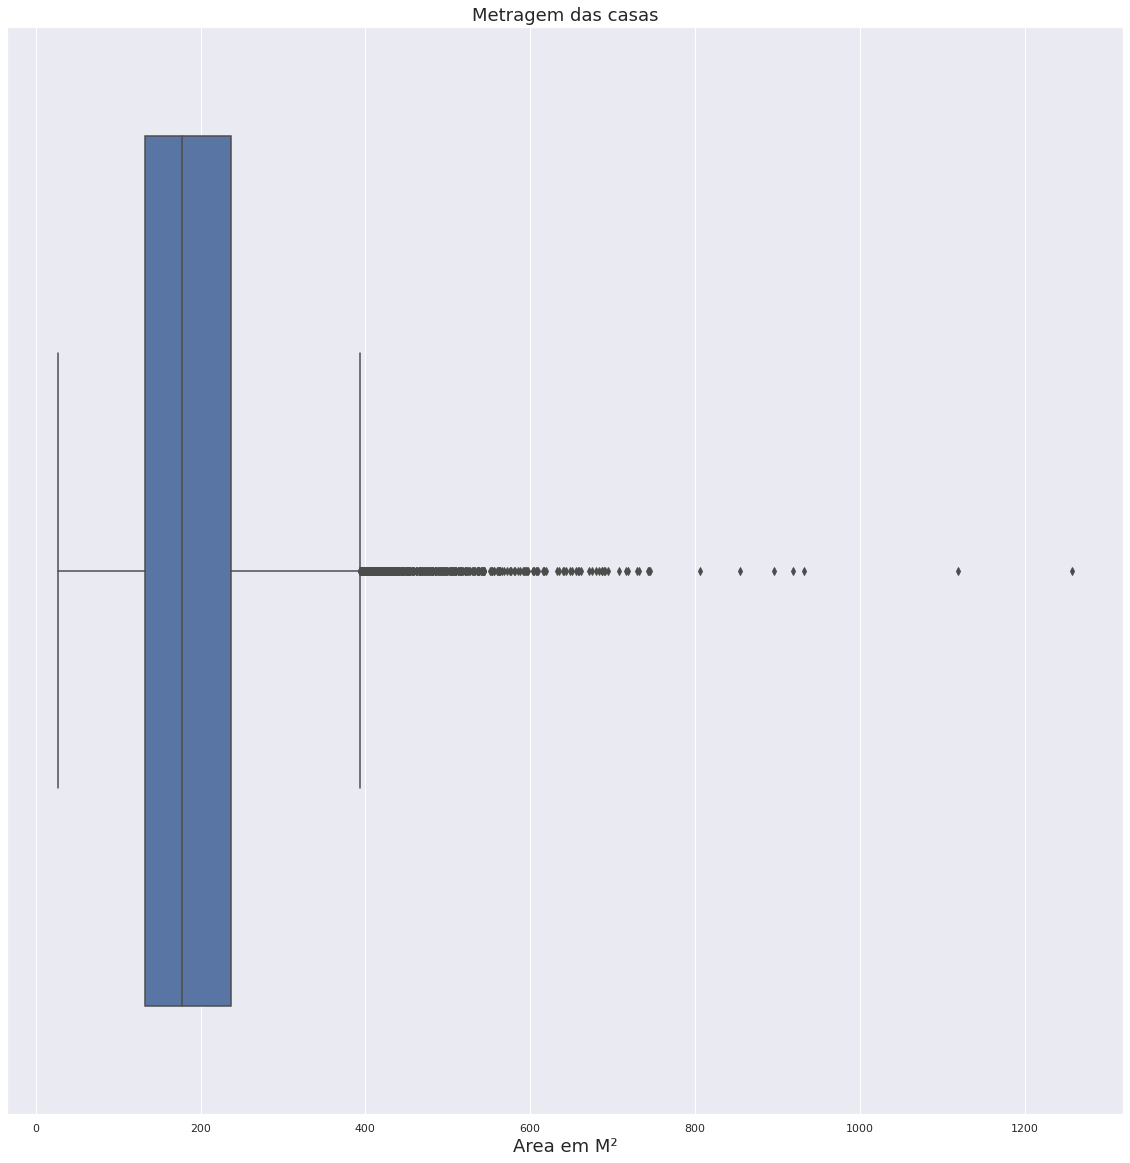

In [ ]:
#### (VALE 0.75 pontos)
#### CONSTRUA O SEU GRAFICO ABAIXO, USE MAIS CELULAS SE NECESSARIO

box = sns.boxplot(df['sqft_living'])
box.set_title('Metragem das casas', fontsize=18)
box.set_xlabel('Area em M²', fontsize=18);

Observando a sua visualização, há casas com tamanhos muito abaixo ou acima do esperado (outliers)? 



No boxplot acima, podemos ver muitos outliers. Os outliers mais evidentes começam com 800m² para frente, o que pode causar anomalias nos resultados obtidos nas regressões.

Não irei trata-los, até por que não foi solicitado, e excluir esses dados podem afetar outros fatores.



Construa um modelo de regressão linear para predizer a variável **price** (preço) com **statsmodels.api**.

In [ ]:
#### (VALE 0.625 pontos)
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

import statsmodels.api as sm
from patsy import dmatrices

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  float64       
 6   sqft_lot       21613 non-null  float64       
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  float64       
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [ ]:
#utilizei as variaveis numericas.
variavel = ['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'bedrooms', 'sqft_lot','floors', 'waterfront', 'view', 'condition', 'sqft_basement', 'lat', 'long', 'sqft_lot15']

In [ ]:
df_vars = df[variavel]

In [ ]:
df_vars = df_vars.dropna()
df_vars.tail()

,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,bedrooms,sqft_lot,floors,waterfront,view,condition,sqft_basement,lat,long,sqft_lot15
21608,360000.0,142.14159,8,142.14159,142.14159,2.50,3,105.073293,3.0,0,0,3,0,47.6993,-122.346,140.190627
21609,400000.0,214.60593,8,214.60593,170.01249,2.50,4,540.045139,2.0,0,0,3,0,47.5107,-122.362,668.901600
21610,402101.0,94.76106,7,94.76106,94.76106,0.75,2,125.419050,2.0,0,0,3,0,47.5944,-122.299,186.456321
21611,400000.0,148.64480,8,148.64480,130.99323,2.50,3,221.852364,2.0,0,0,3,0,47.5345,-122.069,119.566161
21612,325000.0,94.76106,7,94.76106,94.76106,0.75,2,99.963628,2.0,0,0,3,0,47.5941,-122.299,126.069371


In [ ]:
#Usamos a função patsy's dmatricespara criar matrizes de design:
y, X = dmatrices('price ~ sqft_living + grade + sqft_above + sqft_living15 + bathrooms + bedrooms + sqft_lot + floors + waterfront + view + condition + sqft_basement + lat + long + sqft_lot15', data=df_vars, return_type='dataframe')

In [ ]:
#as matrizes/quadros de dados resultantes são assim:
y[:3]

,price
0,221900.0
1,538000.0
2,180000.0


In [ ]:
mod = sm.OLS(y, X)

In [ ]:
res= mod.fit()

Coloque abaixo a saida do seu modelo usando **seu_modelo.summary()**.

In [ ]:
#### (VALE 0.625 pontos)
#### EXECUTE O COMANDO ABAIXO

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     3203.
Date:                Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:41:40   Log-Likelihood:            -2.9546e+05
No. Observations:               21613   AIC:                         5.910e+05
Df Residuals:                   21598   BIC:                         5.911e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.308e+07   1.46e+06    -43.108

Faça outro modelo usando a biblioteca **sklearn**.

In [ ]:
#### (VALE 0.625 pontos)
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

df_1 = df
dfx = df_1.drop(['date', 'id', 'zipcode'], axis= 1) 
dfx.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,tempo
0,221900.0,3,1.00,109.62554,524.901950,1.0,0,0,3,7,109.62554,0,1955,0,47.5112,-122.257,124.49002,524.901950,000000
1,538000.0,3,2.25,238.76071,672.803526,2.0,0,0,3,7,201.59951,400,1951,1991,47.7210,-122.319,157.00607,709.686017,000000
2,180000.0,2,1.00,71.53531,929.030000,1.0,0,0,3,6,71.53531,0,1933,0,47.7379,-122.233,252.69616,748.983986,000000
3,604000.0,4,3.00,182.08988,464.515000,1.0,0,0,5,7,97.54815,910,1965,0,47.5208,-122.393,126.34808,464.515000,000000
4,510000.0,3,2.00,156.07704,750.656240,1.0,0,0,3,8,156.07704,0,1987,0,47.6168,-122.045,167.22540,697.051209,000000


In [ ]:
X = dfx.drop(['price'], axis= 1)
y = dfx.price

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  float64
 3   sqft_lot       21613 non-null  float64
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  float64
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  lat            21613 non-null  float64
 14  long           21613 non-null  float64
 15  sqft_living15  21613 non-null  float64
 16  sqft_lot15     21613 non-null  float64
 17  tempo          21613 non-null  object 
dtypes: flo

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
# Coeficiente de determinacao
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.697367615217919

In [ ]:
# Erro medio absoluto
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

124392.89453016146

In [ ]:
print(f'Valor MAE: {mean_absolute_error(y_test, y_pred):.3f}')

Valor MAE: 124392.895


Qual o valor de ${R}^{2}$ e $MAE$ obtido?

No primeiro modelo deu R² 0.6973, e o MAE deu 124.392,89, considerando que estamos falando em questões de valores, o MAE está com um valor alto, devido ao não tratamento dos outliers, e o R², está acima de 0.5, o que configura um modelo bom.

Faça novamente um novo modelo utilizando a seleção de caracteristicas, selecionando as 5 variaveis mais importantes.

In [ ]:
#### (VALE 0.625 pontos)
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO


In [ ]:
#puxando as 5 principais variaveis
df.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [ ]:
#utilizei as cinco principais variaveis. STATSMODELS
variavel2 = ['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']

In [ ]:
#separei as variaveis no df
df_vars2 = df[variavel2]

In [ ]:
df_vars2 = df_vars2.dropna()
df_vars2.tail()

,price,sqft_living,grade,sqft_above,sqft_living15
21608,360000.0,142.14159,8,142.14159,142.14159
21609,400000.0,214.60593,8,214.60593,170.01249
21610,402101.0,94.76106,7,94.76106,94.76106
21611,400000.0,148.64480,8,148.64480,130.99323
21612,325000.0,94.76106,7,94.76106,94.76106


In [ ]:
#fiz a matriz com as variaveis relevantes
y2, X2 = dmatrices('price ~ sqft_living + grade + sqft_above + sqft_living15', data=df_vars, return_type='dataframe')

In [ ]:
mod2 = sm.OLS(y2, X2)

In [ ]:
res2= mod2.fit()

In [ ]:
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     6392.
Date:                Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:51:30   Log-Likelihood:            -2.9917e+05
No. Observations:               21613   AIC:                         5.983e+05
Df Residuals:                   21608   BIC:                         5.984e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.473e+05   1.35e+04    -47.784

In [ ]:
#ajustando DF para verificar o MAE - SKLEARN
df_vars2.head()

,price,sqft_living,grade,sqft_above,sqft_living15
0,221900.0,109.62554,7,109.62554,124.49002
1,538000.0,238.76071,7,201.59951,157.00607
2,180000.0,71.53531,6,71.53531,252.69616
3,604000.0,182.08988,7,97.54815,126.34808
4,510000.0,156.07704,8,156.07704,167.22540


In [ ]:
#separando as variaveis em x e y
X2 = df_vars2.drop(['price'], axis= 1)
y2 = df_vars2.price

In [ ]:
#transformando
X_std2 = StandardScaler().fit_transform(X2)

In [ ]:
#aplicando
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 10)

In [ ]:
lr2 = LinearRegression()
lr2.fit(X_train2, y_train2)

LinearRegression()

In [ ]:
y_pred2 = lr2.predict(X_test2)

In [ ]:
#R²
r2_score(y_test2, y_pred2)

0.5334778102693459

In [ ]:
#MAE
mean_absolute_error(y_test2, y_pred2)

164345.2156752833

Quais são as 5 variaveis mais importantes deste conjunto de dados?

As cinco principais variaveis conforme a correlação.

price            1.000000

sqft_living      0.702035

grade            0.667434

sqft_above       0.605567

sqft_living15    0.585379


Qual o valor de ${R}^{2}$ e $MAE$ deste novo modelo? Este modelo é melhor do que o anterior?

 O R² deu 0.5334 e o MAE deu : 164.345,21. 
os resultados do segundo modelo, foram piores que o primeiro, pois reduziu o campo de aprendizagem do algoritmo e o erro aumentou consideravelmente.